In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the dataset to the python environment.

In [2]:
data=pd.read_excel("irisnew.xls")

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 1. Read the dataset to the python environment.

In [4]:
data.isna().sum()
#first check the presense of null values

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.shape

(150, 5)

In [7]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

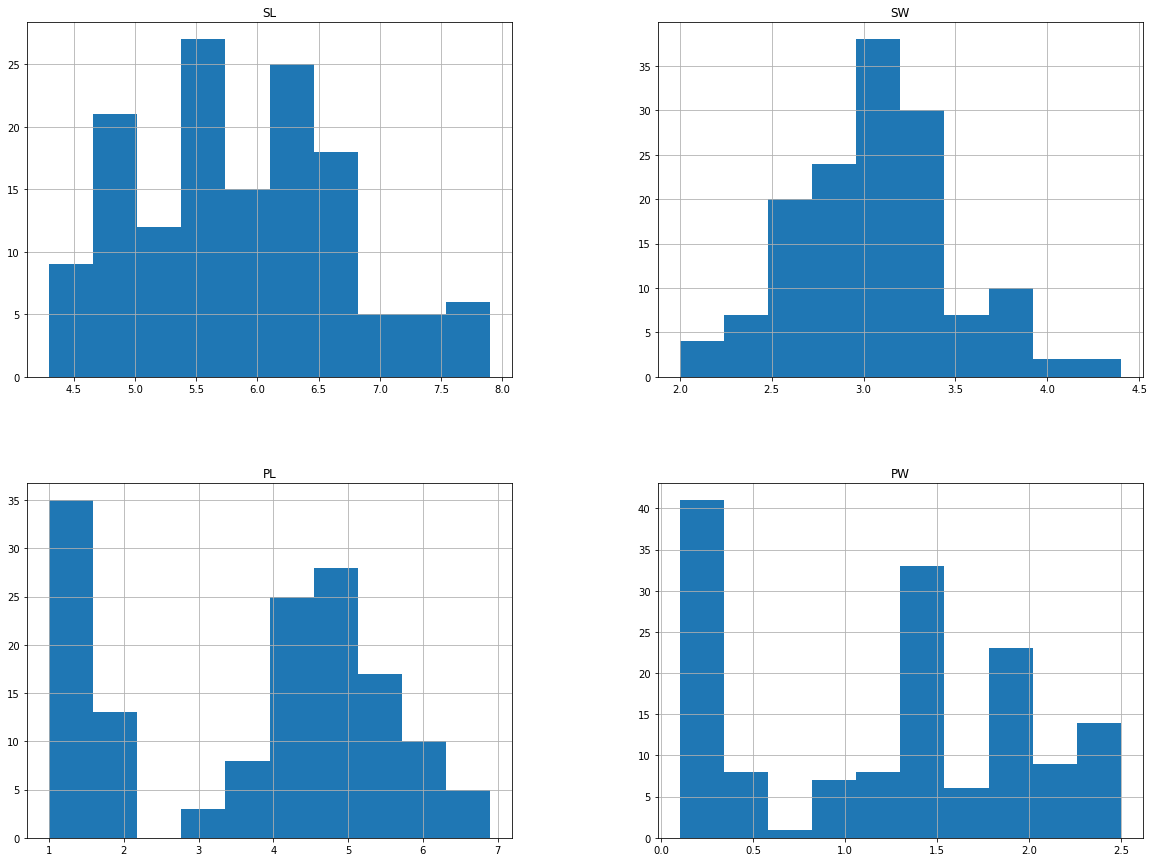

In [8]:
fregraph=data.select_dtypes(include=['float'])
fregraph.hist(figsize=(20,15))
plt.show()

In [9]:
#for i in['SL','SW','PL']:
data['SL']=data['SL'].fillna(data.groupby("Classification")['SL'].transform('mean'))
 #removing null valus by filling with median
data['SW']=data['SW'].fillna(data.groupby("Classification")['SW'].transform('mean'))
data['PL']=data['PL'].fillna(data.groupby("Classification")['PL'].transform('median'))

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [11]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.008511,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


# checking outliers

In [12]:
Q1=np.percentile(data['SL'],25,interpolation='midpoint')
Q2=np.percentile(data['SL'],50,interpolation='midpoint')
Q3=np.percentile(data['SL'],75,interpolation='midpoint')

In [13]:
print(Q1)
print(Q2)
print(Q3)

5.1
5.8
6.4


In [14]:
IQR=Q3-Q1#IQr means interb quartile range

In [15]:
low_lim=Q1-1.5*IQR
up_limit=Q3+1.5*IQR


In [16]:
print(up_limit)
print(low_lim)

8.350000000000001
3.1499999999999986


In [17]:
outlier=[]
for x in data['SW']:
    if(x>up_limit)or(x<low_lim):
        outlier.append(x)

In [18]:
outlier

[3.0,
 3.1,
 2.9,
 3.1,
 3.0,
 3.0,
 3.0,
 3.1,
 3.1,
 3.1,
 3.0,
 2.3,
 3.0,
 3.1,
 2.3,
 2.8,
 2.8,
 2.4,
 2.9,
 2.7,
 2.0,
 3.0,
 2.2,
 2.9,
 2.9,
 3.1,
 3.0,
 2.7,
 2.2,
 2.5,
 2.8,
 2.7812500000000004,
 2.8,
 2.9,
 3.0,
 2.8,
 3.0,
 2.9,
 2.6,
 2.4,
 2.4,
 2.7,
 2.7,
 3.0,
 3.1,
 2.3,
 3.0,
 2.5,
 2.6,
 3.0,
 2.6,
 2.3,
 2.7,
 3.0,
 2.9,
 2.9,
 2.7812500000000004,
 2.8,
 2.7,
 3.0,
 2.9,
 3.0,
 3.0,
 2.5,
 2.9,
 2.5,
 2.7,
 3.0,
 2.5,
 2.8,
 3.0,
 2.6,
 2.2,
 2.8,
 2.8,
 2.7,
 2.96734693877551,
 2.8,
 3.0,
 2.8,
 3.0,
 2.8,
 2.8,
 2.8,
 2.6,
 3.0,
 3.1,
 3.0,
 3.1,
 3.1,
 3.1,
 2.7,
 3.0,
 2.5,
 3.0,
 3.0]

no outlires

In [19]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [20]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [21]:
IQR=Q3-Q1#IQr means interb quartile range

In [22]:
low_lim=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

In [23]:
print(up_limit)
print(low_lim)

4.05
2.05


In [24]:
outlier=[]
for x in data['SW']:
    if(x>up_limit)or(x<low_lim):
        outlier.append(x)

In [25]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [26]:
ind1=data['SW']>up_limit
swind=data.loc[ind1].index

In [27]:
data.drop(swind,inplace=True)

In [28]:
data.shape

(147, 5)

In [29]:
ind2=data['SW']<low_lim
swind1=data.loc[ind2].index

In [30]:
data.drop(swind1,inplace=True)

In [31]:
data.shape

(146, 5)

In [32]:
Q1=np.percentile(data['PL'],25,interpolation='midpoint')
Q2=np.percentile(data['PL'],50,interpolation='midpoint')
Q3=np.percentile(data['PL'],75,interpolation='midpoint')

In [33]:
print(Q1)
print(Q2)
print(Q3)

1.6
4.4
5.1


In [34]:
#for finding index of all outliers
IQR=Q3-Q1#IQr means interb quartile range
low_lim=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
outlier=[]
for x in data['SW']:
    if(x>up_limit)or(x<low_lim):
        outlier.append(x)
outlier

[]

no outliers

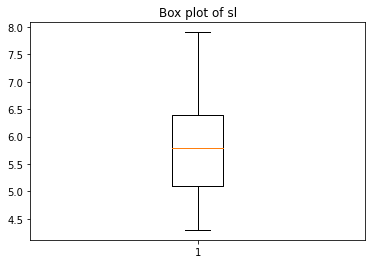

In [35]:
plt.boxplot(data['SL'])
plt.title('Box plot of sl')
plt.show()

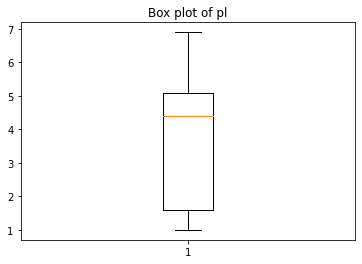

In [36]:
plt.boxplot(data['PL'])
plt.title('Box plot of pl')
plt.show()

# Find out which classification model gives the best result to predict iris
#species.(also do random forest algorithm)

Label encoding

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])
# 3 classification of data xist so label encoding is better

In [38]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.008511,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,5.55,2.0,2
148,6.200000,3.4,5.40,2.3,2


In [39]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [40]:
x.head()

,SL,SW,PL,PW
0,5.100000,3.5,1.4,0.2
1,4.900000,3.0,1.4,0.2
2,5.008511,3.2,1.3,0.2
3,4.600000,3.1,1.5,0.2
4,5.000000,3.6,1.4,0.2


In [41]:
#splitting data into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=4,test_size=0.20)

In [42]:
x.shape

(146, 4)

In [43]:
y.shape

(146,)

# logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
IoR_model=LogisticRegression()
IoR_model.fit(x_train,y_train)
y_pred=IoR_model.predict(x_test)

C:\Users\dasar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [46]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is",precision_score(y_test,y_pred,average='macro'))
print("recall is",recall_score(y_test,y_pred,average='macro'))
print("f1 score is",f1_score(y_test,y_pred,average='macro'))



Accuracy is: 1.0
precision is 1.0
recall is 1.0
f1 score is 1.0


In [47]:
#confusionmatrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  7]], dtype=int64)

2.KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(x_train,y_train)
    y_pred=Classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    

In [49]:
acc_values

[1.0,
 1.0,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

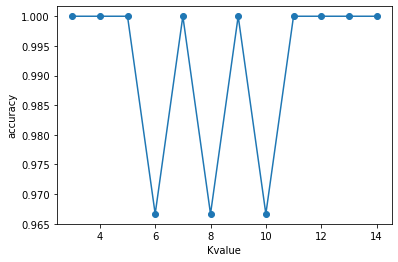

In [50]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('Kvalue')
plt.ylabel('accuracy')

In [51]:
Classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
Classifier.fit(x_train,y_train)
y_pred=Classifier.predict(x_test)

In [52]:
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is",precision_score(y_test,y_pred,average='macro'))
print("recall is",recall_score(y_test,y_pred,average='macro'))
print("f1 score is",f1_score(y_test,y_pred,average='macro'))


Accuracy is: 1.0
precision is 1.0
recall is 1.0
f1 score is 1.0


In [53]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  7]], dtype=int64)

3.decision tree classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
dm=DecisionTreeClassifier()
dm.fit(x_train,y_train)
y_pred=dm.predict(x_test)
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is",precision_score(y_test,y_pred,average='macro'))
print("recall is",recall_score(y_test,y_pred,average='macro'))
print("f1 score is",f1_score(y_test,y_pred,average='macro'))


Accuracy is: 0.9666666666666667
precision is 0.9629629629629629
recall is 0.9523809523809524
f1 score is 0.9547511312217195


In [57]:
y_test.value_counts()

0    15
1     8
2     7
Name: Classification, dtype: int64

In [60]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  6]], dtype=int64)

4.Suppport vector machine

In [63]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)


print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is",precision_score(y_test,y_pred,average='macro'))
print("recall is",recall_score(y_test,y_pred,average='macro'))
print("f1 score is",f1_score(y_test,y_pred,average='macro'))


Accuracy is: 1.0
precision is 1.0
recall is 1.0
f1 score is 1.0


In [64]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  7]], dtype=int64)

In [68]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='poly')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)


print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is",precision_score(y_test,y_pred,average='macro'))
print("recall is",recall_score(y_test,y_pred,average='macro'))
print("f1 score is",f1_score(y_test,y_pred,average='macro'))


Accuracy is: 1.0
precision is 1.0
recall is 1.0
f1 score is 1.0


In [66]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)


print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is",precision_score(y_test,y_pred,average='macro'))
print("recall is",recall_score(y_test,y_pred,average='macro'))
print("f1 score is",f1_score(y_test,y_pred,average='macro'))


Accuracy is: 1.0
precision is 1.0
recall is 1.0
f1 score is 1.0


5.random forest classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)


print("Accuracy is:",accuracy_score(y_test,y_pred))
print("precision is",precision_score(y_test,y_pred,average='macro'))
print("recall is",recall_score(y_test,y_pred,average='macro'))
print("f1 score is",f1_score(y_test,y_pred,average='macro'))


Accuracy is: 1.0
precision is 1.0
recall is 1.0
f1 score is 1.0
